# Convolutions and pooling

In this notebook convolutions and pooling will be explored. Initially, the fundamentals of convolutions and pooling will be described, followed by, using these techniques in a neural network.

## Fundamentals of convolutions

Using only dense layers in a DNN for classification means that the input image typically needs to be small, centered and in greyscale for the network to learn efficiently. Unfortunately, for most applications this isn't practical.

Below a manually coded convolution is shown on a simple 512x512 greyscale image.

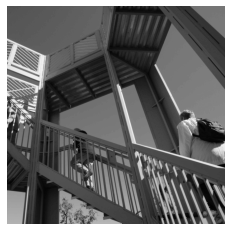

In [11]:
import cv2
import numpy as np
from scipy import misc
import matplotlib.pyplot as plt

# Load default image from scipy
i = misc.ascent()

# Use matplotlib to draw the image
plt.grid(False)
plt.gray()
plt.axis('off')
plt.imshow(i)
plt.show()

In [12]:
i_transformed = np.copy(i)
size_x, size_y = i_transformed.shape

# Create a 3x3 filter. Filters with different values create varying effects. 
# Experiment with the filters below by uncommenting them.
#filter = [[0, 1, 0], [1, -4, 1], [0, 1, 0]]
filter = [[-1, -2, -1], [0, 0, 0], [1, 2, 1]] # vertical lines
#filter = [[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]] # horizonal lines

# The above filters add up to 0 or 1 so we can maintain a weight of 1. 
# However, if they don't add up to 0 or 1, we must set a weight so that 
# the total value becomes 1. For example, if the values add up to 10, we 
# must set a weight of .1.
weight = 1

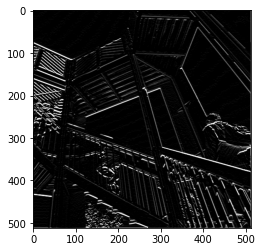

In [14]:
# Perform a convolution
filter_size_x, filter_size_y = 3, 3

for x in range(1, size_x - 1):
    for y in range(1, size_y - 1):
        convolution = 0.0
        
        for filter_x in range(filter_size_x):
            for filter_y in range(filter_size_y):
                i_x = x + filter_x - 1
                i_y = y + filter_y - 1
                convolution += i[i_x, i_y] * filter[filter_x][filter_y]

        convolution *= weight

        if convolution < 0:
            convolution = 0
        if convolution > 255:
            convolution = 255

        i_transformed[x, y] = convolution

# Plot result
plt.gray()
plt.grid(False)
plt.imshow(i_transformed)
plt.show()

## Fundamentals of pooling

The aim of pooling is to reduce the overall amount of information in an image, while at the same time maintaining the features that are detected at present. There are many different types of pooling, but probably the simplest is 'max' which selects the largest value in each pool.

Below is an example of 4x4 max pooling.

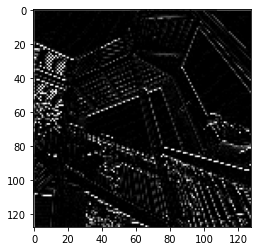

In [15]:
new_x, new_y = int(size_x/4), int(size_y/4)
new_image = np.zeros((new_x, new_y))

pool_size_x, pool_size_y = 4, 4

# Perform max pooling
for x in range(0, size_x, 4):
    for y in range(0, size_y, 4):
        pixels = []
        
        for pool_x in range(filter_size_x):
            for pool_y in range(filter_size_y):
                pixels.append(i_transformed[x, y])

        pixels.sort(reverse=True)
        new_image[int(x/4), int(y/4)] = pixels[0]

# Display reduced size image
plt.gray()
plt.grid(False)
plt.imshow(new_image)
plt.show()


## Improving the DNN with convolution and max pooling

Using a normal DNN with two dense layers on the MNIST fashion dataset we can expect around 87% accuracy on the validation dataset. Instead, with the help of convolution and max pool operations, we can achieve 91% accuracy on the validation dataset.

In [ ]:
import tensorflow as tf

# Gather dataset and normalise images
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (val_images, val_labels) = mnist.load_data()
training_images = training_images.reshape(60000, 28, 28, 1)
training_images = training_images / 255.0
val_images = val_images.reshape(10000, 28, 28, 1)
val_images = val_images / 255.0

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(training_images, training_labels, validation_data=(val_images, val_labels), epochs=20)